In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape((-1,28,28,1)).astype(np.float32)/255.0
x_test=x_test.reshape((-1,28,28,1)).astype(np.float32)/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [8]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [9]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train,y_train,epochs=15,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7558 - loss: 0.6681 - val_accuracy: 0.8576 - val_loss: 0.3884
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8667 - loss: 0.3611 - val_accuracy: 0.8897 - val_loss: 0.2984
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8844 - loss: 0.3063 - val_accuracy: 0.8876 - val_loss: 0.2976
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8997 - loss: 0.2707 - val_accuracy: 0.9026 - val_loss: 0.2731
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9054 - loss: 0.2505 - val_accuracy: 0.9100 - val_loss: 0.2486
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9130 - loss: 0.2302 - val_accuracy: 0.9150 - val_loss: 0.2392
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9206 - loss: 0.2109 - val_accuracy: 0.9107 - val_loss: 0.2433
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9271 -

In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9142 - loss: 0.2895
Test loss: 0.285, Test accuracy: 0.914


In [15]:
if y_test.ndim == 2:  # i.e., one-hot encoded
    y_test = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


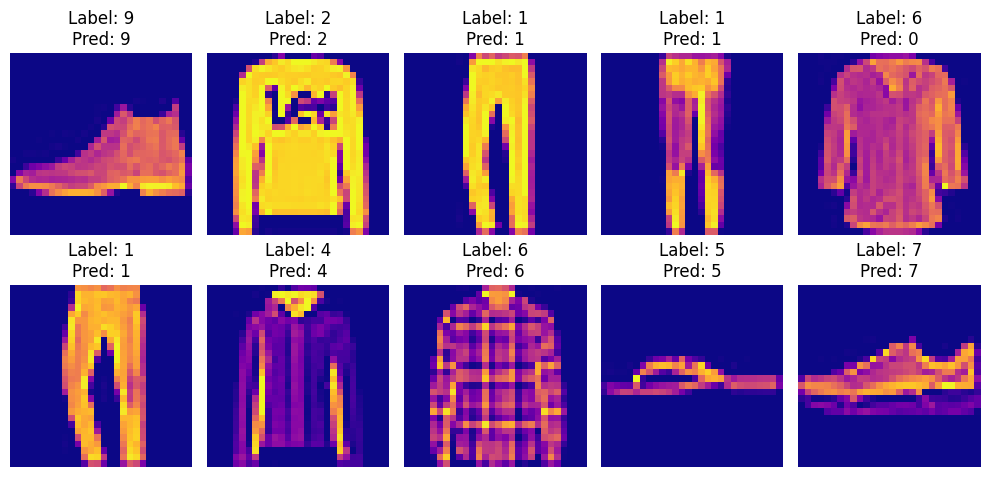

In [17]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='plasma')
    plt.title(f"Label: {y_test[i]}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
#Save the model
model.save('trained_model.h5')

In [19]:
#Export trained model to SavedModel
model=tf.keras.models.load_model('trained_model.h5')
tf.saved_model.save(model,'saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Conversion To TFLite Formate

In [20]:
model=tf.keras.models.load_model('trained_model.h5')

In [21]:
#Convert the model to Tensorflow lite formate
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ADARSH\AppData\Local\Temp\tmpl5ylwhfk\assets


INFO:tensorflow:Assets written to: C:\Users\ADARSH\AppData\Local\Temp\tmpl5ylwhfk\assets


Saved artifact at 'C:\Users\ADARSH\AppData\Local\Temp\tmpl5ylwhfk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1975711802368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975711800784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975715705456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975715695424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975712035968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975712813072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975712814304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1975712815008: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [22]:
with open('model.tflite','wb') as f:
    f.write(tflite_model)